<a href="https://colab.research.google.com/github/satwikakallem/Home_Assignment1/blob/main/home_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Step 1: Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6), minval=0, maxval=10, dtype=tf.float32)

# Step 2: Find rank and shape of the tensor
rank = tf.rank(tensor)  # Get the rank (number of dimensions)
shape = tf.shape(tensor)  # Get the shape

print(f"Original Tensor:\n{tensor}")
print(f"Rank: {rank.numpy()}, Shape: {shape.numpy()}")

# Step 3: Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print(f"\nReshaped Tensor (2, 3, 4):\n{reshaped_tensor}")

# Step 4: Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print(f"\nTransposed Tensor (3, 2, 4):\n{transposed_tensor}")

# Step 5: Broadcasting a smaller tensor (1, 4) to match the larger tensor
small_tensor = tf.constant([[1.0, 2.0, 3.0, 4.0]])  # Shape (1, 4)

# Broadcasting it to match shape (3, 2, 4)
broadcasted_tensor = tf.broadcast_to(small_tensor, shape=(3, 2, 4))

# Adding the broadcasted tensor to the transposed tensor
result_tensor = transposed_tensor + broadcasted_tensor
print(f"\nBroadcasted Tensor:\n{broadcasted_tensor}")
print(f"\nResult after Addition:\n{result_tensor}")

# Explanation of Broadcasting in TensorFlow:
# Broadcasting allows tensors with different shapes to be added, multiplied, etc.
# TensorFlow automatically expands dimensions when one tensor has a smaller shape,
# making element-wise operations possible without explicit replication.
# In this case, a (1, 4) tensor is expanded to (3, 2, 4) to match the transposed tensor.


Original Tensor:
[[8.347074  5.991862  7.314875  4.331764  3.0891323 6.8218317]
 [2.925166  3.3416855 3.8856602 0.1802361 7.877845  1.3067043]
 [2.3006606 7.1404877 5.4341173 7.9160786 8.648985  9.7973385]
 [1.1631167 8.867834  5.512122  2.1706498 7.1158743 6.194071 ]]
Rank: 2, Shape: [4 6]

Reshaped Tensor (2, 3, 4):
[[[8.347074  5.991862  7.314875  4.331764 ]
  [3.0891323 6.8218317 2.925166  3.3416855]
  [3.8856602 0.1802361 7.877845  1.3067043]]

 [[2.3006606 7.1404877 5.4341173 7.9160786]
  [8.648985  9.7973385 1.1631167 8.867834 ]
  [5.512122  2.1706498 7.1158743 6.194071 ]]]

Transposed Tensor (3, 2, 4):
[[[8.347074  5.991862  7.314875  4.331764 ]
  [2.3006606 7.1404877 5.4341173 7.9160786]]

 [[3.0891323 6.8218317 2.925166  3.3416855]
  [8.648985  9.7973385 1.1631167 8.867834 ]]

 [[3.8856602 0.1802361 7.877845  1.3067043]
  [5.512122  2.1706498 7.1158743 6.194071 ]]]

Broadcasted Tensor:
[[[1. 2. 3. 4.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [1. 2. 3. 4.]]

 [[1. 2. 3. 4.]
  [1. 2

Original MSE Loss: 0.02500000223517418
Original Categorical Cross-Entropy Loss: 0.16425204277038574
Modified MSE Loss: 0.06499999761581421
Modified Categorical Cross-Entropy Loss: 0.2899092435836792


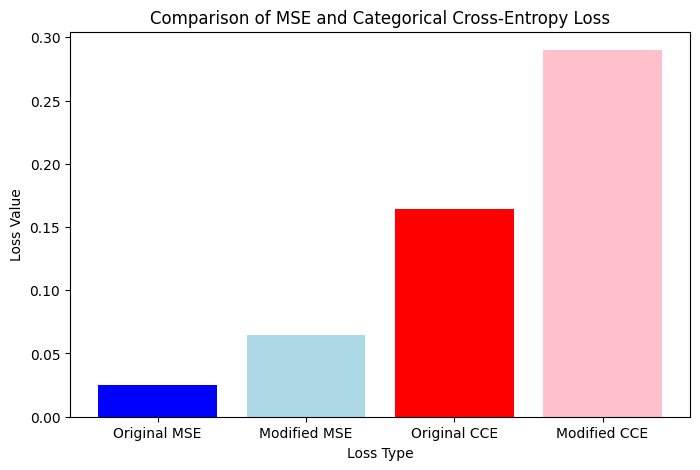

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([0, 1, 0, 1], dtype=tf.float32)  # Binary classification labels
y_pred = tf.constant([0.1, 0.9, 0.2, 0.8], dtype=tf.float32)  # Predicted probabilities

# Step 2: Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse_loss = tf.keras.losses.MeanSquaredError()
cce_loss = tf.keras.losses.CategoricalCrossentropy()

# Convert y_true to one-hot encoding for CCE
y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=2)
y_pred_reshaped = tf.stack([1 - y_pred, y_pred], axis=1)  # Convert to categorical predictions

mse_value = mse_loss(y_true, y_pred).numpy()
cce_value = cce_loss(y_true_one_hot, y_pred_reshaped).numpy()

print(f"Original MSE Loss: {mse_value}")
print(f"Original Categorical Cross-Entropy Loss: {cce_value}")

# Step 3: Modify predictions slightly and check how loss values change
y_pred_modified = tf.constant([0.2, 0.8, 0.3, 0.7], dtype=tf.float32)
y_pred_modified_reshaped = tf.stack([1 - y_pred_modified, y_pred_modified], axis=1)

mse_value_modified = mse_loss(y_true, y_pred_modified).numpy()
cce_value_modified = cce_loss(y_true_one_hot, y_pred_modified_reshaped).numpy()

print(f"Modified MSE Loss: {mse_value_modified}")
print(f"Modified Categorical Cross-Entropy Loss: {cce_value_modified}")

# Step 4: Plot loss function values using Matplotlib
loss_types = ['Original MSE', 'Modified MSE', 'Original CCE', 'Modified CCE']
loss_values = [mse_value, mse_value_modified, cce_value, cce_value_modified]

plt.figure(figsize=(8, 5))
plt.bar(loss_types, loss_values, color=['blue', 'lightblue', 'red', 'pink'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Categorical Cross-Entropy Loss")
plt.show()

# Explanation:
# - MSE measures the squared differences between true values and predictions.
# - CCE measures the difference between probability distributions, important for classification tasks.
# - Modifying predictions closer to true values reduces both loss values, indicating better performance.


Original MSE Loss: 0.02500000223517418
Original Categorical Cross-Entropy Loss: 0.16425204277038574
Modified MSE Loss: 0.06499999761581421
Modified Categorical Cross-Entropy Loss: 0.2899092435836792


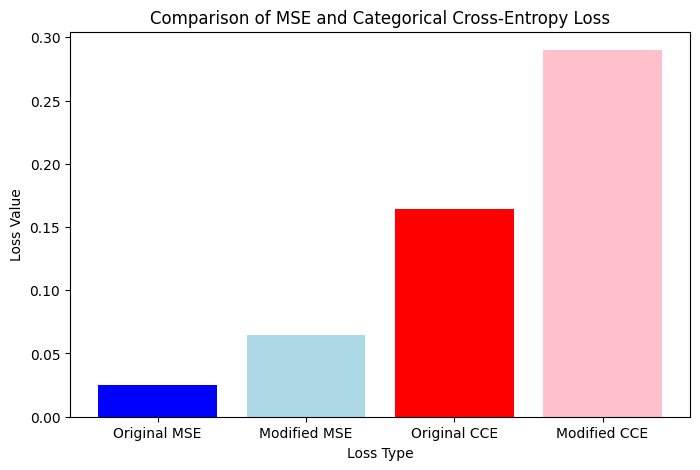

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([0, 1, 0, 1], dtype=tf.float32)  # Binary classification labels
y_pred = tf.constant([0.1, 0.9, 0.2, 0.8], dtype=tf.float32)  # Predicted probabilities

# Step 2: Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse_loss = tf.keras.losses.MeanSquaredError()
cce_loss = tf.keras.losses.CategoricalCrossentropy()

# Convert y_true to one-hot encoding for CCE
y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), depth=2)
y_pred_reshaped = tf.stack([1 - y_pred, y_pred], axis=1)  # Convert to categorical predictions

mse_value = mse_loss(y_true, y_pred).numpy()
cce_value = cce_loss(y_true_one_hot, y_pred_reshaped).numpy()

print(f"Original MSE Loss: {mse_value}")
print(f"Original Categorical Cross-Entropy Loss: {cce_value}")

# Step 3: Modify predictions slightly and check how loss values change
y_pred_modified = tf.constant([0.2, 0.8, 0.3, 0.7], dtype=tf.float32)
y_pred_modified_reshaped = tf.stack([1 - y_pred_modified, y_pred_modified], axis=1)

mse_value_modified = mse_loss(y_true, y_pred_modified).numpy()
cce_value_modified = cce_loss(y_true_one_hot, y_pred_modified_reshaped).numpy()

print(f"Modified MSE Loss: {mse_value_modified}")
print(f"Modified Categorical Cross-Entropy Loss: {cce_value_modified}")

# Step 4: Plot loss function values using Matplotlib
loss_types = ['Original MSE', 'Modified MSE', 'Original CCE', 'Modified CCE']
loss_values = [mse_value, mse_value_modified, cce_value, cce_value_modified]

plt.figure(figsize=(8, 5))
plt.bar(loss_types, loss_values, color=['blue', 'lightblue', 'red', 'pink'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Categorical Cross-Entropy Loss")
plt.show()

# Explanation:
# - MSE measures the squared differences between true values and predictions.
# - CCE measures the difference between probability distributions, important for classification tasks.
# - Modifying predictions closer to true values reduces both loss values, indicating better performance.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define a simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

print("Training complete. Run the following command to launch TensorBoard:")
print("tensorboard --logdir=logs/fit")

# Explanation:
# - Loads the MNIST dataset and normalizes the pixel values.
# - Defines a simple neural network with a dropout layer to prevent overfitting.
# - Uses sparse categorical cross-entropy loss for multi-class classification.
# - Logs training data to TensorBoard for visualization.
# - You can monitor loss and accuracy trends by running TensorBoard.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8559 - loss: 0.4841 - val_accuracy: 0.9590 - val_loss: 0.1397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9539 - loss: 0.1553 - val_accuracy: 0.9669 - val_loss: 0.1074
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9675 - loss: 0.1093 - val_accuracy: 0.9734 - val_loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9751 - loss: 0.0825 - val_accuracy: 0.9755 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9771 - loss: 0.0740 - val_accuracy: 0.9769 - val_loss: 0.0776
Training complete. Run the following command to launch TensorBoard:
tensorboard --logdir=logs/fit
